### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [2]:
df = pd.read_csv('rankedrm_clean.csv').drop(columns='Unnamed: 0')
df

,country.win,rating.win,rating_change.win,civ.win,color.win,country.lose,rating.lose,rating_change.lose,civ.lose,color.lose,map_type.name,civ.lose.name,civ.win.name,matchup,duration/mins,map_type
0,MX,1671,0,27,8,GT,1680,0,28,1,Islands,Saracens,Portuguese,Portuguese-Saracens,26.62,9
1,CL,1254,16,19,4,GB,1268,-16,2,1,Arabia,Britons,Koreans,Britons-Koreans,42.43,1
2,US,1084,15,0,2,CO,1071,-15,0,5,Arabia,Aztecs,Aztecs,Aztecs-Aztecs,14.98,1
3,PL,1596,0,35,2,FR,1589,0,28,1,Arabia,Saracens,Vietnamese,Saracens-Vietnamese,21.07,1
4,CO,668,0,16,2,MX,672,0,19,1,Islands,Koreans,Italians,Italians-Koreans,8.75,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82432,US,1340,15,27,1,CZ,1338,-15,28,2,Arabia,Saracens,Portuguese,Portuguese-Saracens,21.97,1
82433,BE,944,14,0,1,DE,916,-14,8,2,MegaRandom,Chinese,Aztecs,Aztecs-Chinese,12.53,11
82434,GR,933,0,12,1,IT,968,0,10,2,Arena,Ethiopians,Goths,Ethiopians-Goths,24.17,2
82435,AU,807,15,26,3,SG,799,-15,21,2,Golden Pit,Magyars,Persians,Magyars-Persians,35.20,10


### Color Win Rate

In [3]:
df['color.win'] = df['color.win'].replace(0, np.nan)

In [4]:
df.dropna(subset='color.win', inplace=True)

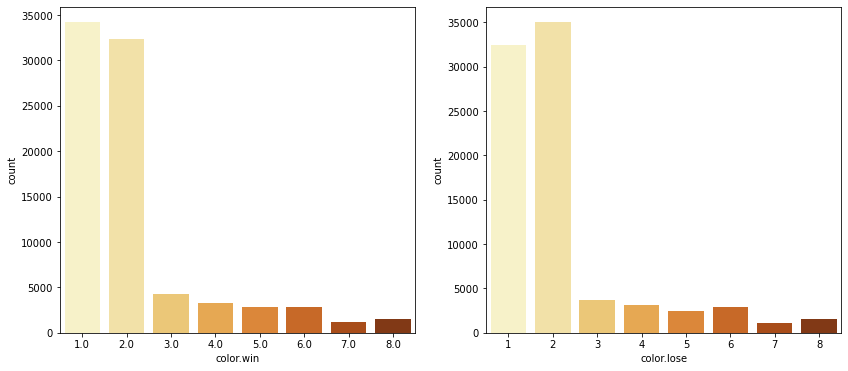

In [5]:
f, ax = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=df, x='color.win', palette='YlOrBr', ax=ax[0])
sns.countplot(data=df, x='color.lose', palette='YlOrBr',ax=ax[1])
plt.show()

In [6]:
total_games = df.groupby('color.win')['color.win'].count() + df.groupby('color.lose')['color.lose'].count()

total_wins = df.groupby('color.win')['color.win'].count()

average_wins = total_wins / total_games

general_average_wins_color = pd.DataFrame({'color': average_wins.index, 'winrate': average_wins.values})

general_average_wins_color = general_average_wins_color.sort_values('winrate', ascending=False)

general_average_wins_color

,color,winrate
2,3.0,0.533308
4,5.0,0.531422
6,7.0,0.519748
3,4.0,0.516311
0,1.0,0.512940
5,6.0,0.490410
7,8.0,0.488038
1,2.0,0.479881


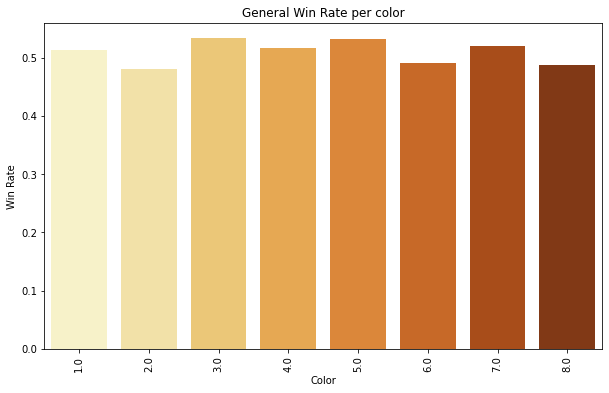

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=general_average_wins_color, x='color', y='winrate', palette='YlOrBr')
plt.xlabel('Color')
plt.ylabel('Win Rate')
plt.title('General Win Rate per color')
plt.xticks(rotation=90)
plt.show()

### Civilizations Win Rate and Matchups

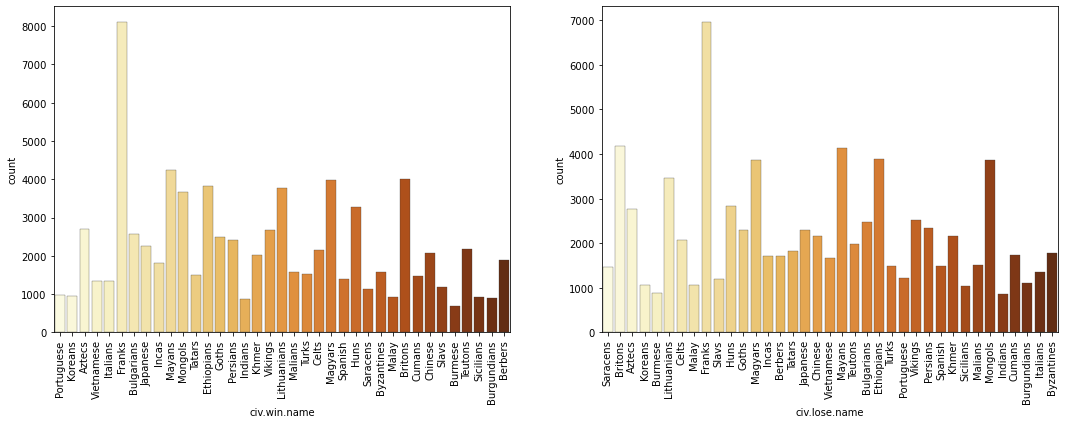

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.countplot(data=df, x='civ.win.name', palette='YlOrBr', edgecolor='.2', linewidth=.3, ax=ax[0])
ax[0].tick_params(axis='x', rotation=90) 
sns.countplot(data=df, x='civ.lose.name', palette='YlOrBr', edgecolor='.2', linewidth=.3,  ax=ax[1])
ax[1].tick_params(axis='x', rotation=90) 

In [9]:
total_games = df.groupby('civ.win.name')['civ.win.name'].count() + df.groupby('civ.lose.name')['civ.lose.name'].count()

total_wins = df.groupby('civ.win.name')['civ.win.name'].count()

average_wins = total_wins / total_games

general_average_wins = pd.DataFrame({'civ': average_wins.index, 'winrate': average_wins.values})

general_average_wins = general_average_wins.sort_values('winrate', ascending=False)

general_average_wins.head()

,civ,winrate
11,Franks,0.538145
13,Huns,0.536327
33,Teutons,0.526088
1,Berbers,0.524377
12,Goths,0.521612


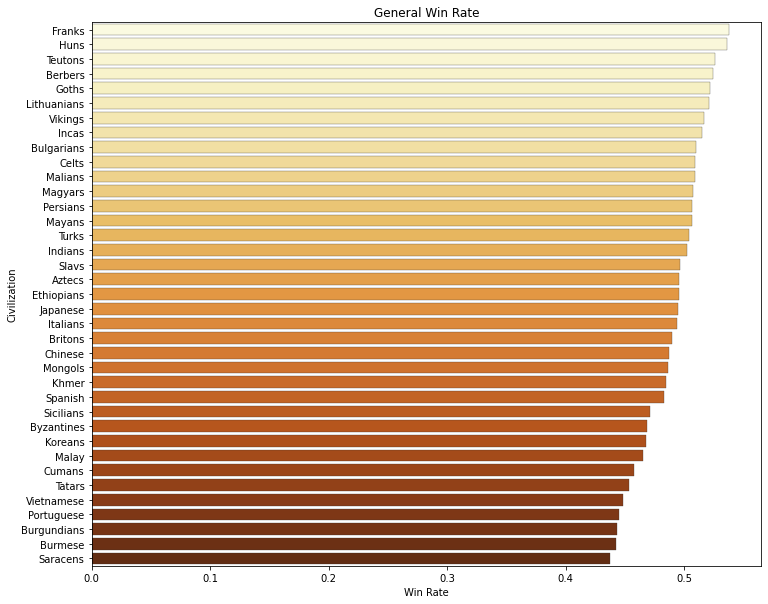

In [10]:
plt.figure(figsize=(12, 10))
sns.barplot(data=general_average_wins, x='winrate', y='civ', edgecolor='.2', linewidth=.3, palette='YlOrBr')
plt.xlabel('Win Rate')
plt.ylabel('Civilization')
plt.title('General Win Rate')
plt.show()

##### Now we want to calculate the Win Rate based on three categorys of ratings

In [11]:
rating_limits = [0, 1300, float('inf')]

df['rating.win.category'] = pd.cut(df['rating.win'], bins=rating_limits, labels=['Noob level(0 - 1300)', 'Mid and Pro level(1300 - 2k+)'])
df['rating.lose.category'] = pd.cut(df['rating.lose'], bins=rating_limits, labels=['Noob level(0 - 1300)', 'Mid and Pro level(1300 - 2k+)'])

total_games = df.groupby(['civ.win.name', 'rating.win.category'])['civ.win.name'].count() + df.groupby(['civ.lose.name', 'rating.lose.category'])['civ.lose.name'].count()

total_wins = df.groupby(['civ.win.name', 'rating.win.category'])['civ.win.name'].count()

average_wins = total_wins / total_games

average_wins_df = pd.DataFrame({'civ': average_wins.index.get_level_values(0), 
                                'rating_category': average_wins.index.get_level_values(1), 
                                'winrate': average_wins.values})

average_wins_df = average_wins_df.sort_values('winrate', ascending=False)

average_wins_df

,civ,rating_category,winrate
27,Huns,Mid and Pro level(1300 - 2k+),0.554286
25,Goths,Mid and Pro level(1300 - 2k+),0.551606
23,Franks,Mid and Pro level(1300 - 2k+),0.544056
29,Incas,Mid and Pro level(1300 - 2k+),0.542484
22,Franks,Noob level(0 - 1300),0.536761
...,...,...,...
70,Vietnamese,Noob level(0 - 1300),0.444145
11,Burmese,Mid and Pro level(1300 - 2k+),0.435453
56,Saracens,Noob level(0 - 1300),0.431930
45,Malay,Mid and Pro level(1300 - 2k+),0.423408


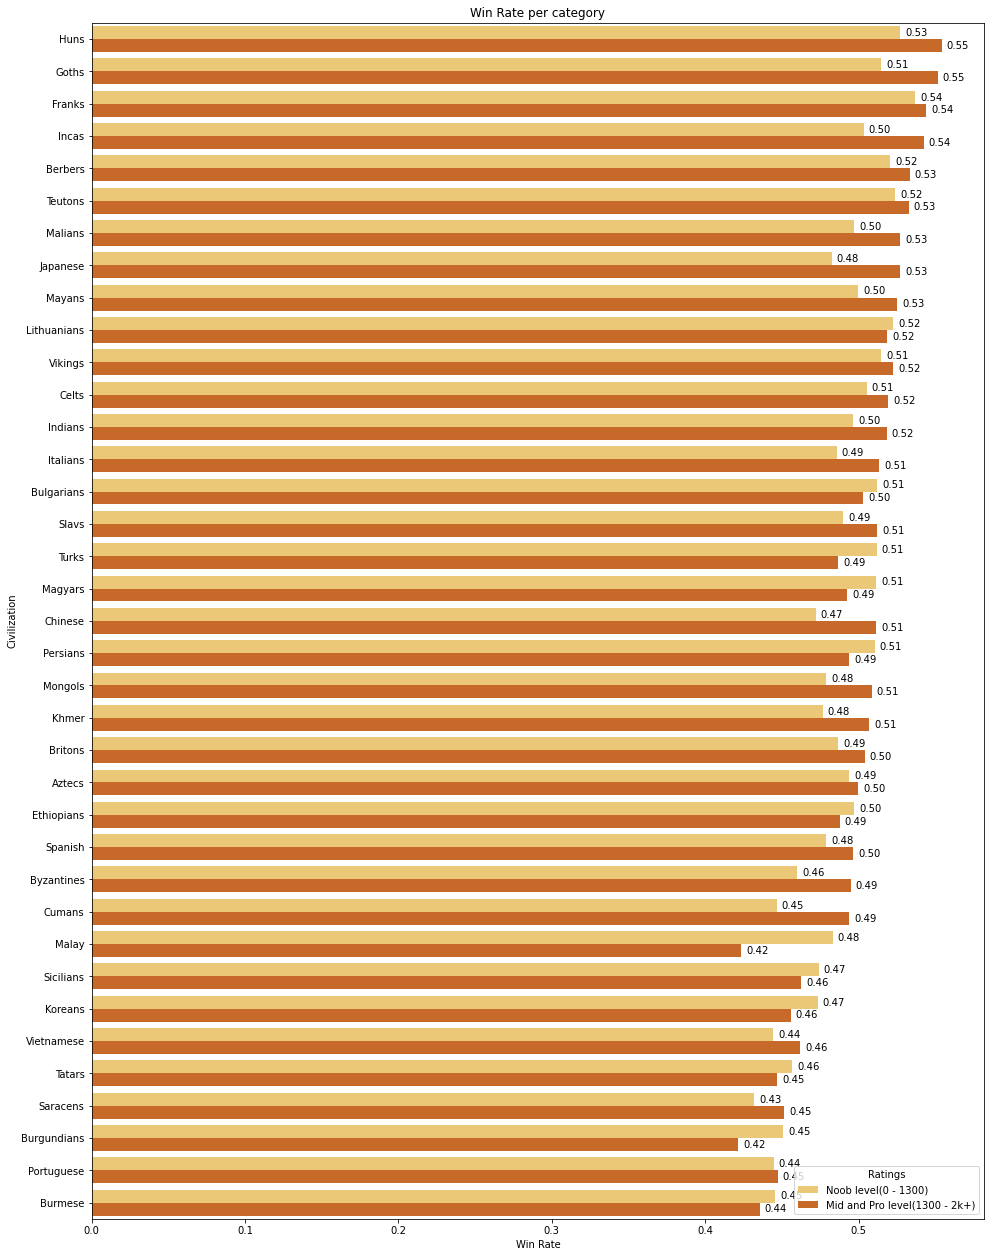

In [12]:
plt.figure(figsize=(16, 22))
ax = sns.barplot(data=average_wins_df, x='winrate', y='civ', hue='rating_category', palette='YlOrBr')
plt.xlabel('Win Rate')
plt.ylabel('Civilization')
plt.title('Win Rate per category')
plt.legend(title='Ratings')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


##### We already know the average Winrate of all the civilizations per category. But, What about the matchups?

In [13]:
import itertools

categories = df['rating.win.category'].unique()
civilizations = df['civ.win.name'].unique()

all_combinations = list(itertools.permutations(civilizations, 2))

win_count = {}

for category in categories:
    win_count[category] = {}
    
    for combination in all_combinations:
        civilization_1, civilization_2 = combination
        civilization_1_wins = df[(df['civ.win.name'] == civilization_1) & (df['civ.lose.name'] == civilization_2) & (df['rating.win.category'] == category)]
        civilization_2_wins = df[(df['civ.win.name'] == civilization_2) & (df['civ.lose.name'] == civilization_1) & (df['rating.lose.category'] == category)]

        win_count[category][combination] = {
            civilization_1: len(civilization_1_wins),
            civilization_2: len(civilization_2_wins)
        }

winrate_data = []

for category in categories:
    for combination in all_combinations:
        civilization_1, civilization_2 = combination
        total_matches = win_count[category][combination][civilization_1] + win_count[category][combination][civilization_2]
        
        if total_matches > 0:
            civilization_1_winrate = win_count[category][combination][civilization_1] / total_matches
            civilization_2_winrate = win_count[category][combination][civilization_2] / total_matches
        else:
            civilization_1_winrate = 0
            civilization_2_winrate = 0
        
        winrate_data.append({
            'category': category,
            'civilization': civilization_1,
            'adversary': civilization_2,
            'civilization.winrate': civilization_1_winrate,
            'adversary.winrate': civilization_2_winrate,
            'total_matches': total_matches
        })

results_df = pd.DataFrame(winrate_data)

results_df = results_df.head(2664)
results_df

,category,civilization,adversary,civilization.winrate,adversary.winrate,total_matches
0,Mid and Pro level(1300 - 2k+),Portuguese,Koreans,0.769231,0.230769,13
1,Mid and Pro level(1300 - 2k+),Portuguese,Aztecs,0.285714,0.714286,21
2,Mid and Pro level(1300 - 2k+),Portuguese,Vietnamese,0.500000,0.500000,12
3,Mid and Pro level(1300 - 2k+),Portuguese,Italians,0.407407,0.592593,27
4,Mid and Pro level(1300 - 2k+),Portuguese,Franks,0.294118,0.705882,34
...,...,...,...,...,...,...
2659,Noob level(0 - 1300),Berbers,Slavs,0.565217,0.434783,23
2660,Noob level(0 - 1300),Berbers,Burmese,0.578947,0.421053,19
2661,Noob level(0 - 1300),Berbers,Teutons,0.387755,0.612245,49
2662,Noob level(0 - 1300),Berbers,Sicilians,0.692308,0.307692,39


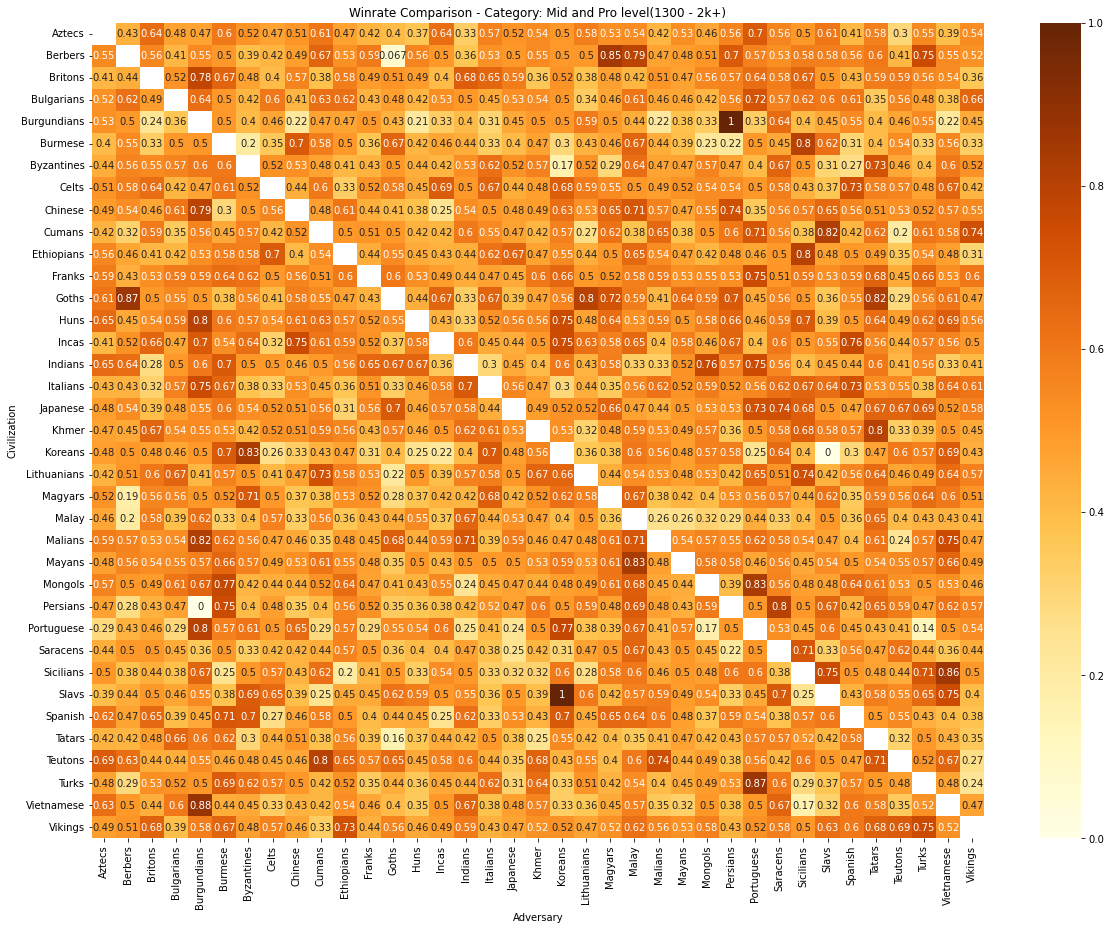

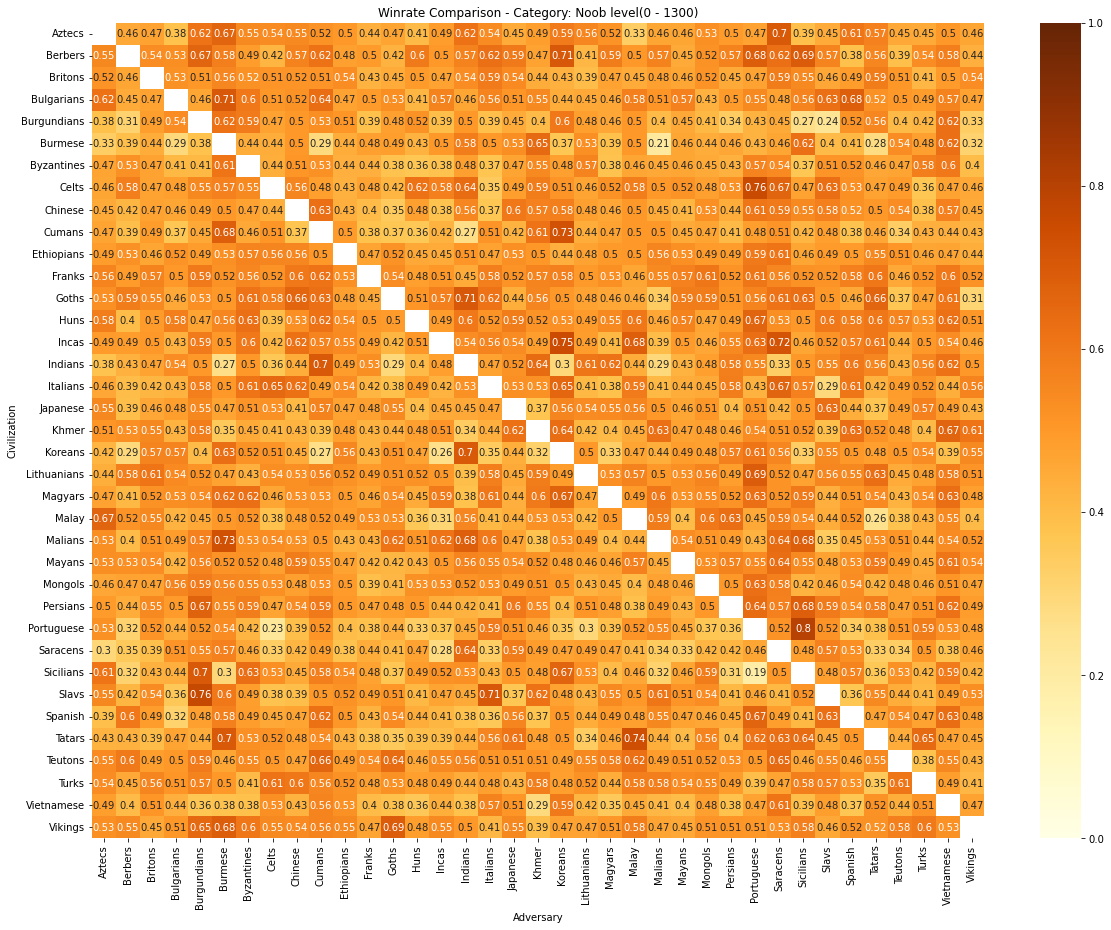

In [14]:
categories = results_df['category'].unique()

for category in categories:
    subset = results_df[results_df['category'] == category]
    pivoted_df = subset.pivot_table(index='civilization', columns='adversary', values='civilization.winrate', aggfunc='mean')

    plt.figure(figsize=(20, 15))
    sns.heatmap(pivoted_df, annot=True, cmap='YlOrBr', cbar=True, vmin=0, vmax=1)
    plt.title(f'Winrate Comparison - Category: {category}')
    plt.xlabel('Adversary')
    plt.ylabel('Civilization')
    plt.show()

###### I would like to add the map variable but taking into account that there are 2664 possible matchups there is not so many data to carry out it. Maybe in a future I'll collect more samples to do that.  

In [15]:
df[['map_type.name']].value_counts()

map_type.name
Arabia           53180
Arena             8682
Four Lakes        4955
Fortress          2569
Acropolis         2514
Atacama           2426
Nomad             1668
Hideout           1661
Islands           1463
Golden Pit        1462
MegaRandom        1391
Migration          465
dtype: int64

### Curiosities

##### Rating change 

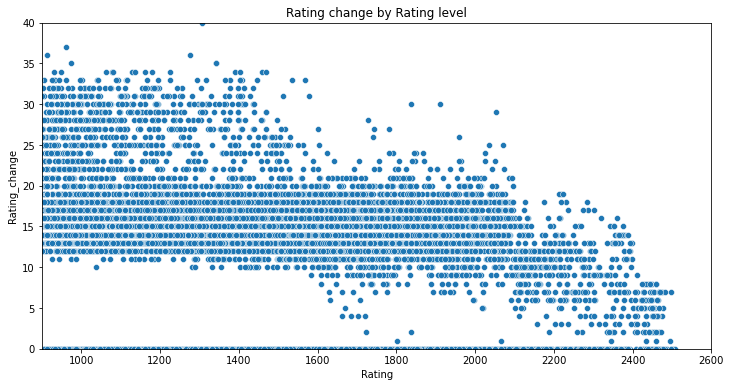

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rating.win', y='rating_change.win', palette='YlOrBr')
plt.xlabel('Rating')
plt.ylabel('Rating_change')
plt.xlim(900, 2600) ### Reasonable Rateds
plt.ylim(0, 40) ### To avoid strange negative values caused by bugs
plt.title('Rating change by Rating level')
plt.show()

The rating you earn per game is less and less as you increase your rating.

##### Country winrates

In [17]:
total_games = df.groupby('country.win')['country.win'].count() + df.groupby('country.lose')['country.lose'].count()

total_wins = df.groupby('country.win')['country.win'].count()

average_wins = total_wins / total_games

average_wins = average_wins[total_games > 1000]

general_average_wins = pd.DataFrame({'country': average_wins.index, 'winrate': average_wins.values})

general_average_wins = general_average_wins.sort_values('winrate', ascending=False)

general_average_wins.head()

,country,winrate
31,VN,0.526127
13,FI,0.519167
8,CN,0.515884
27,SE,0.514286
0,AR,0.513210


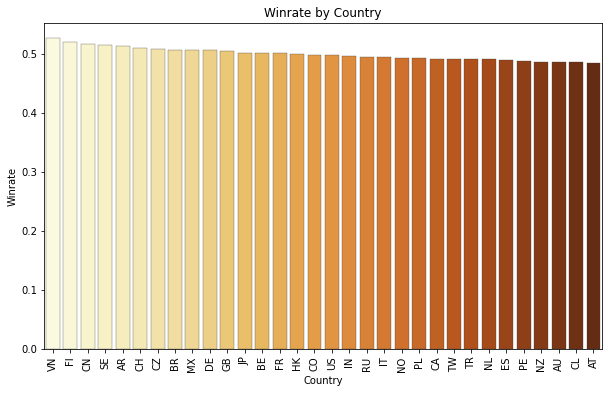

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=general_average_wins, x='country', y='winrate', palette='YlOrBr', edgecolor='.2', linewidth=.3)
plt.xlabel('Country')
plt.ylabel('Winrate')
plt.title('Winrate by Country')
plt.xticks(rotation=90)
plt.show()

Here it can be seen the top 20 country winrates and even more:
* 1 - Vietnam
* 2 - Finland
* 3 - China
* 4 - Sweden
* 5 - Argentina
* 6 - Swiss
* 7 - Czech Republic
* 8 - Brazil
* 9 - Mexico
* 10 - Germany
* 11 - United Kingdom
* 12 - Japan
* 13 - Belgium
* 14 - France
* 15 - Hong Kong
* 16 - Colombia
* 17 - United States
* 18 - India
* 19 - Russia
* 20 - Italy
